In [2]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import lmfit as lm

plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np

In [4]:
# import data from text file
import pandas as pds


damic_data = pds.read_csv("DAMIC_EXCESS_sigvE_good.txt", skiprows=1, \
                         names=['Energy', 'Sig'], \
                         delim_whitespace=False
                     )

print (damic_data.head(10))

E = np.asarray(damic_data["Energy"], dtype=np.float32)

print (E)

   Energy     Sig
0  0.0365  0.5807
1  0.0502  0.6562
2  0.0480  0.3319
3  0.0909  0.3687
4  0.0716  0.5467
5  0.0747  0.7223
6  0.1107  0.6469
7  0.1205  0.7591
8  0.1292  0.6982
9  0.1439  0.7202
[0.0365 0.0502 0.048  0.0909 0.0716 0.0747 0.1107 0.1205 0.1292 0.1439
 0.2005 0.1818 0.2147 0.2421 0.2888 0.511  0.6174 0.7043 0.8837 0.8365]


In [5]:
#make histos (counts per day)

ebins = np.linspace(0,1,20)
xcq = (ebins[:-1] + ebins[1:]) / 2
n,nx = np.histogram(E,bins=ebins)

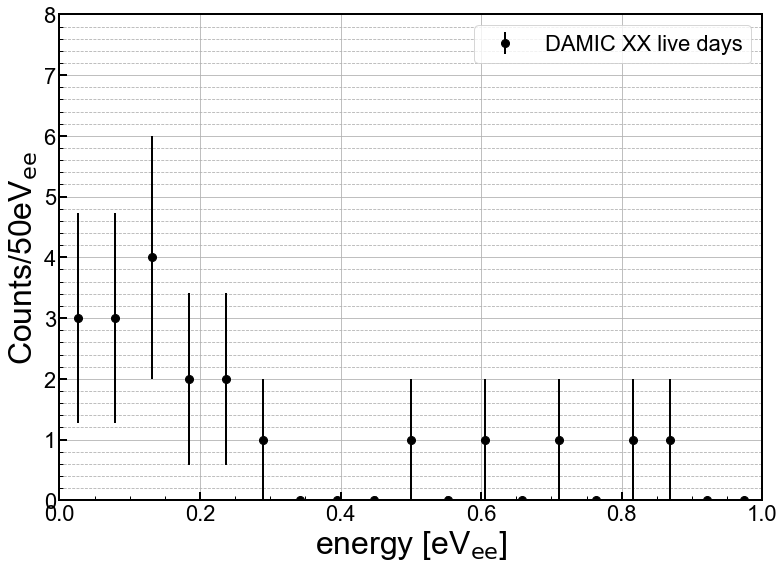

In [8]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(11.0,8.0),sharex=True)
ax1 = axes



#print(estring)


ax1.errorbar(xcq,n,yerr=np.sqrt(n), marker='o', markersize=8, \
             ecolor='k',color='k', linestyle='none', label='DAMIC XX live days', linewidth=2)



ymin = 0
ymax = 8

blue = '#118DFA'



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [eV$_{\mathrm{ee}}$]')
ax1.set_ylabel('Counts/50eV$_{\mathrm{ee}}$')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()